# **นำเข้าข้อมูล**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/DX210/6723765498(bakery_sales_revised).xlsx")

In [ ]:
data

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,2016-10-30 09:58:00,morning,weekend
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend
4,3,Jam,2016-10-30 10:07:00,morning,weekend
...,...,...,...,...,...
20502,9682,Coffee,2017-04-09 14:32:00,afternoon,weekend
20503,9682,Tea,2017-04-09 14:32:00,afternoon,weekend
20504,9683,Coffee,2017-04-09 14:57:00,afternoon,weekend
20505,9683,Pastry,2017-04-09 14:57:00,afternoon,weekend


In [ ]:
len(data)

20507

# **check Missing data , cleaningData ,แปลงเป็นlist**

In [ ]:
data['Item'] = data['Item'].str.strip() # ตัดช่องว่างหน้า/หลัง
data.dropna(subset=['Transaction'], inplace=True) # ลบแถวที่ TransactionNo ว่าง
data['Transaction'] = data['Transaction'].astype(str) # แปลงเป็น string

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64


In [ ]:
records = data.groupby('Transaction')['Item'].apply(list).values.tolist() #แปลงข้อมูลให้เป็นlist
print(records[:5]) #ตัวอย่าง5Listแรก

[['Bread'], ['Scandinavian', 'Medialuna'], ['Bread'], ['Scandinavian', 'Chimichurri Oil'], ['Bread', 'Truffles']]


# **กราฟ**

<Axes: xlabel='weekday_weekend', ylabel='count'>

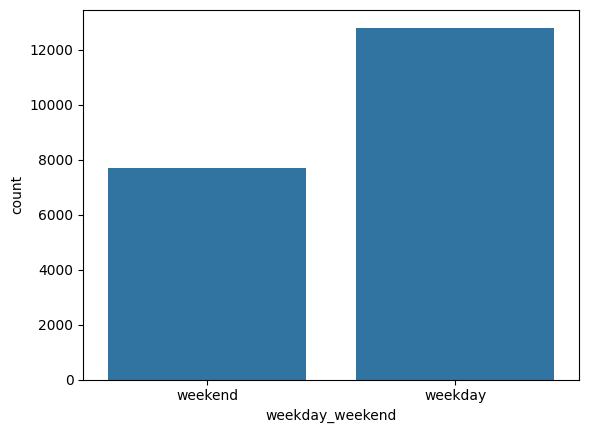

In [ ]:
sns.countplot(data=data, x='weekday_weekend')

In [ ]:
data.columns = data.columns.str.strip()

In [ ]:
heatmap_data = pd.crosstab(data['period_day'], data['weekday_weekend'])

In [ ]:
day_order = ['morning', 'afternoon', 'evening', 'night']
heatmap_data = heatmap_data.reindex(day_order)

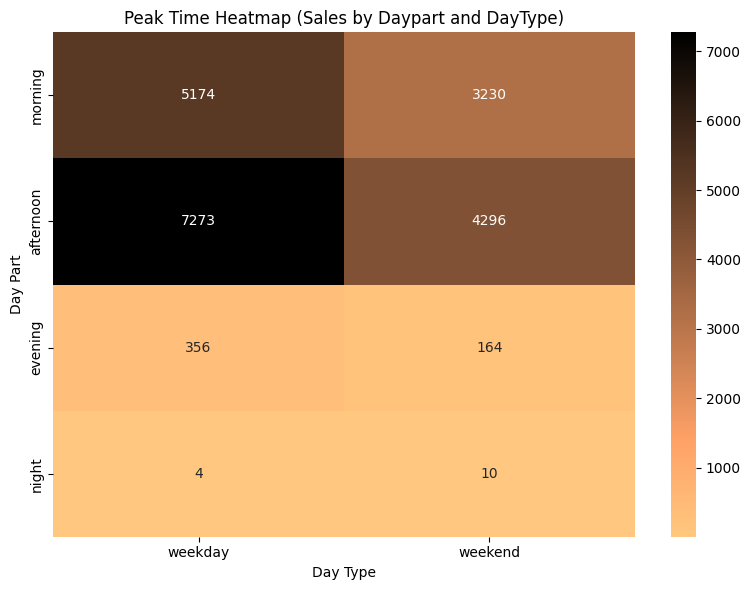

In [ ]:
# --- 3. สร้างกราฟ Heatmap ---
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='d',
    cmap='copper_r'
)

# --- 4. ตั้งชื่อและแสดงผล ---
plt.title('Peak Time Heatmap (Sales by Daypart and DayType)')
plt.xlabel('Day Type')
plt.ylabel('Day Part')
plt.tight_layout()
plt.savefig('peak_time_heatmap.png')

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
    data = pd.read_excel("/content/drive/MyDrive/DX210/6723765498(bakery_sales_revised).xlsx")
except FileNotFoundError:
    data = pd.read_csv("/content/drive/MyDrive/DX210/6723765498(bakery_sales_revised).xlsx")

data.columns = data.columns.str.strip()

#การเตรียมข้อมูล
print("กำลังเตรียมข้อมูลสำหรับ Scatter Plot...")

scatter_data = data.groupby('Item')['weekday_weekend'].value_counts().unstack().fillna(0)

print("เตรียมข้อมูลเสร็จแล้ว (สร้าง scatter_data เรียบร้อย)")

กำลังเตรียมข้อมูลสำหรับ Scatter Plot...
เตรียมข้อมูลเสร็จแล้ว (สร้าง scatter_data เรียบร้อย)


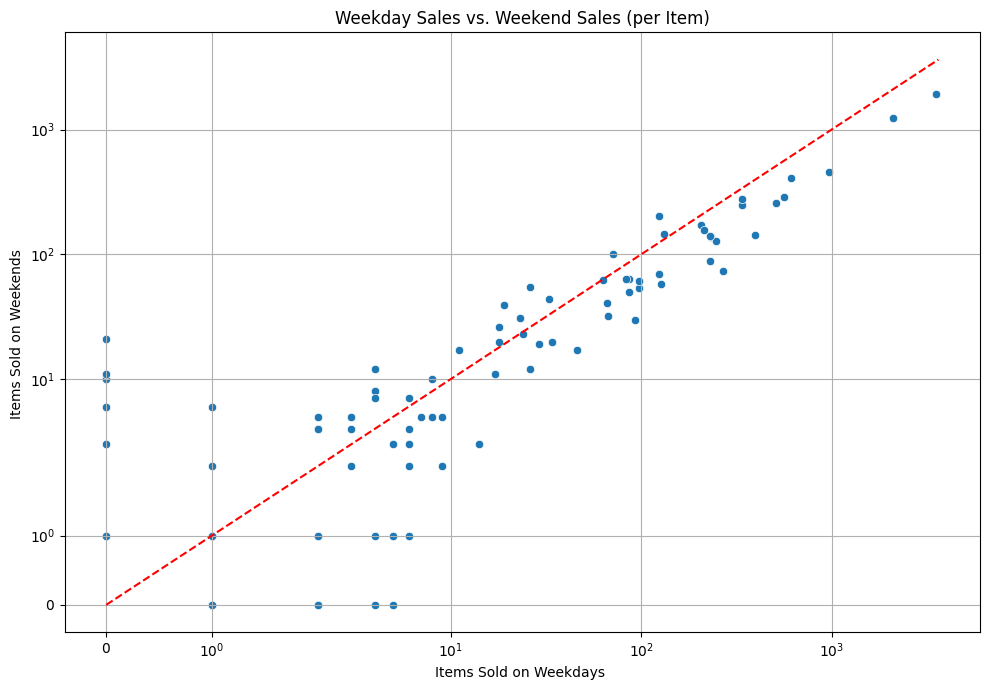

In [ ]:
catter_data = data.groupby('Item')['weekday_weekend'].value_counts().unstack().fillna(0)
#สร้างกราฟ Scatter Plot

plt.figure(figsize=(10, 7))

sns.scatterplot(
    data=scatter_data,
    x='weekday',  # ให้แกน X เป็นยอดขายวันธรรมดา
    y='weekend'   # ให้แกน Y เป็นยอดขายวันหยุด
)

plt.xscale('symlog')
plt.yscale('symlog')

max_val = max(scatter_data['weekday'].max(), scatter_data['weekend'].max()) + 100
plt.plot([0, max_val], [0, max_val], 'r--')


# --- 4. ตั้งชื่อกราฟและแสดงผล ---
plt.title('Weekday Sales vs. Weekend Sales (per Item)')
plt.xlabel('Items Sold on Weekdays ')
plt.ylabel('Items Sold on Weekends ')
plt.grid(True)
plt.tight_layout()

/tmp/ipython-input-347891623.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


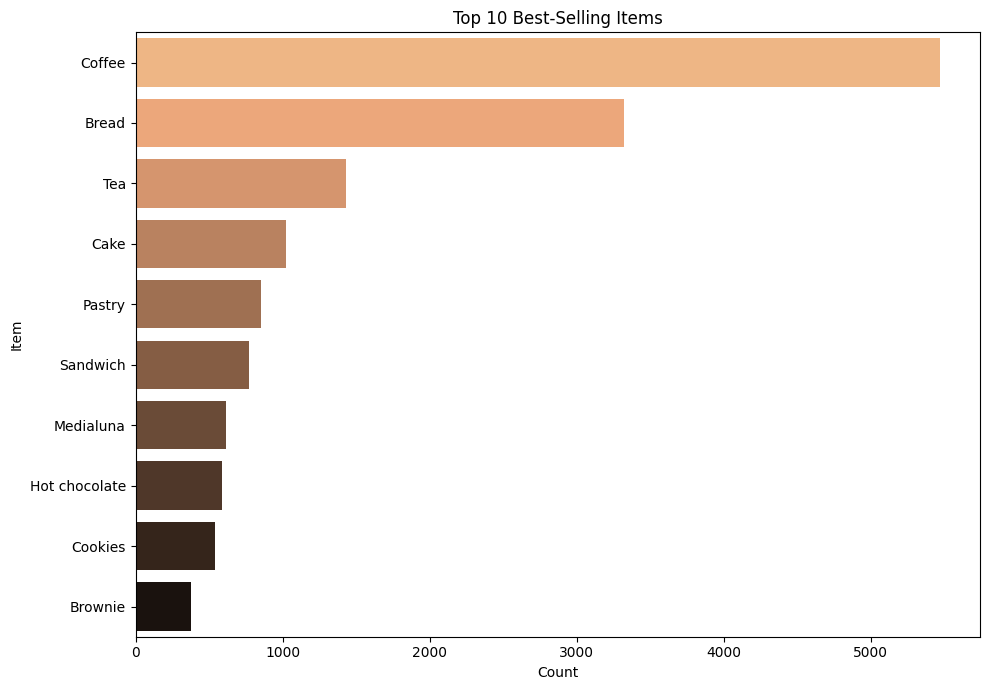

In [ ]:
plt.figure(figsize=(10, 7)) # ขยายขนาดกราฟ (แกน Y จะมี 10 รายการ)

sns.countplot(
    data=data,
    y='Item',  # <-- เปลี่ยนเป็นแกน Y (y='Item')
    order=data['Item'].value_counts().head(10).index, #เลือก Top 10
    palette='copper_r'
)

# --- 4. ตั้งชื่อกราฟ (ภาษาอังกฤษ) ---
plt.title('Top 10 Best-Selling Items')
plt.xlabel('Count')
plt.ylabel('Item')
plt.tight_layout()

# **Train Apriori**

In [ ]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=230202afd6b1db1219aa73df9173edf001e58d65e5887a029d4f771879c3dac5
  Stored in directory: /root/.cache/pip/wheels/7f/49/e3/42c73b19a264de37129fadaa0c52f26cf50e87de08fb9804af
Successfully built apyori


In [ ]:
import pandas as pd
from apyori import apriori
import time

In [ ]:
start_time = time.time()

In [ ]:
results_apriori = list(apriori(records,
                               min_support = 0.005,
                               min_confidence = 0.25,
                               min_lift = 1.1
                              ))

In [ ]:
end_time = time.time()
time_apriori = end_time - start_time
print(f"   -> Apriori ใช้เวลา: {time_apriori:.4f} วินาที")

   -> Apriori ใช้เวลา: 30.2388 วินาที


In [ ]:
for i in range((len(results_apriori))):

    LHS = list(results_apriori[i][2][0][0])
    RHS = list(results_apriori[i][2][0][1])
    support = results_apriori[i][1]
    confidence = results_apriori[i][2][0][2]
    lift = results_apriori[i][2][0][3]

    print(f"\nRule {i+1}:")
    print(f"  LHS (ถ้าซื้อ): {LHS} => RHS (จะซื้อ): {RHS}")
    print(f"  Support : {support:.4f}")
    print(f"  Confidence : {confidence:.4f}")
    print(f"  Lift : {lift:.4f}")
    print(10*"----")


Rule 1:
  LHS (ถ้าซื้อ): ['Alfajores'] => RHS (จะซื้อ): ['Coffee']
  Support : 0.0197
  Confidence : 0.5407
  Lift : 1.1302
----------------------------------------

Rule 2:
  LHS (ถ้าซื้อ): ['Cake'] => RHS (จะซื้อ): ['Coffee']
  Support : 0.0547
  Confidence : 0.5270
  Lift : 1.1015
----------------------------------------

Rule 3:
  LHS (ถ้าซื้อ): ['Hearty & Seasonal'] => RHS (จะซื้อ): ['Coffee']
  Support : 0.0057
  Confidence : 0.5400
  Lift : 1.1288
----------------------------------------

Rule 4:
  LHS (ถ้าซื้อ): ['Juice'] => RHS (จะซื้อ): ['Coffee']
  Support : 0.0206
  Confidence : 0.5342
  Lift : 1.1167
----------------------------------------

Rule 5:
  LHS (ถ้าซื้อ): ['Keeping It Local'] => RHS (จะซื้อ): ['Coffee']
  Support : 0.0054
  Confidence : 0.8095
  Lift : 1.6922
----------------------------------------

Rule 6:
  LHS (ถ้าซื้อ): ['Medialuna'] => RHS (จะซื้อ): ['Coffee']
  Support : 0.0352
  Confidence : 0.5692
  Lift : 1.1899
---------------------------------------

In [ ]:
import pandas as pd

In [ ]:
rules_list = []
for i in range(0, len(results_apriori)):
    for rule in results_apriori[i][2]:
        LHS = list(rule[0]) # สินค้าฝั่งซ้าย (If)
        RHS = list(rule[1]) # สินค้าฝั่งขวา (Then)
        support = results_apriori[i][1]
        confidence = rule[2]
        lift = rule[3]

        if len(LHS) > 0:
            rules_list.append([LHS, RHS, support, confidence, lift])

rules_df = pd.DataFrame(rules_list,
                        columns=['LHS (ถ้าซื้อ)', 'RHS (จะซื้อ)', 'Support', 'Confidence', 'Lift'])


# ---  การเรียงลำดับ (Sort) และสรุปผล ---
# 3. Sort ตาม 'Lift' (ค่าความน่าสนใจ) จากมากไปน้อย
sorted_rules_df = rules_df.sort_values(by='Lift', ascending=False)

# 4. แสดงผล 5 กฎที่ "น่าสนใจที่สุด"
print(f"--- 5 อันดับความสัมพันธ์ที่มีค่า 'Lift' มากที่สุด ---")#เรียงตามlift
display(sorted_rules_df.head(5))

sorted_by_confidence = rules_df.sort_values(by='Confidence', ascending=False)
print("\n--- 5 อันดับความสัมพันธ์ที่มีค่า 'Confidence' มากที่สุด ---")#เรียงตามConfidence
display(sorted_by_confidence.head(5))

#แสดง support 5 อันดับแรก
sorted_by_support_df = rules_df.sort_values(by='Support', ascending=False)
print(f"--- 5 อันดับความสัมพันธ์ที่มีค่า 'Support' มากที่สุด ---") #เรียงตามsupport
display(sorted_by_support_df.head(5))

--- 5 อันดับความสัมพันธ์ที่มีค่า 'Lift' มากที่สุด ---


,LHS (ถ้าซื้อ),RHS (จะซื้อ),Support,Confidence,Lift
12,[Coke],[Sandwich],0.005177,0.266304,3.706722
13,[Soup],[Tea],0.009086,0.263804,1.849557
4,[Keeping It Local],[Coffee],0.005388,0.809524,1.692169
11,[Toast],[Coffee],0.023666,0.704403,1.472431
7,[Salad],[Coffee],0.006550,0.626263,1.309094



--- 5 อันดับความสัมพันธ์ที่มีค่า 'Confidence' มากที่สุด ---


,LHS (ถ้าซื้อ),RHS (จะซื้อ),Support,Confidence,Lift
4,[Keeping It Local],[Coffee],0.005388,0.809524,1.692169
11,[Toast],[Coffee],0.023666,0.704403,1.472431
7,[Salad],[Coffee],0.006550,0.626263,1.309094
14,"[Cake, Hot chocolate]",[Coffee],0.006867,0.601852,1.258067
9,[Spanish Brunch],[Coffee],0.010882,0.598837,1.251766


--- 5 อันดับความสัมพันธ์ที่มีค่า 'Support' มากที่สุด ---


,LHS (ถ้าซื้อ),RHS (จะซื้อ),Support,Confidence,Lift
1,[Cake],[Coffee],0.054728,0.526958,1.101515
6,[Pastry],[Coffee],0.047544,0.552147,1.154168
8,[Sandwich],[Coffee],0.038246,0.532353,1.112792
5,[Medialuna],[Coffee],0.035182,0.569231,1.189878
11,[Toast],[Coffee],0.023666,0.704403,1.472431


# **Train FP-Growth**


In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder # Library สำหรับแปลงข้อมูลเป็น True/False Matrix
from mlxtend.frequent_patterns import fpgrowth, association_rules
from IPython.display import display
import time

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
#สร้าง(List of Lists)
records = data.groupby('Transaction')['Item'].apply(list).values.tolist()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
#ขั้นตอนเตรียมข้อมูลสำหรับ FP-Growth
te = TransactionEncoder()
te_ary = te.fit_transform(records)
basket_df = pd.DataFrame(te_ary, columns=te.columns_)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
start_time = time.time()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
# --- 1. เทรน FP-Growth (กรองด้วย Support >= 0.5%) ---
frequent_itemsets = fpgrowth(basket_df, min_support=0.005, use_colnames=True)

# --- 2. สร้างกฎ (กรองด้วย Lift >= 1.1) ---
rules_fp_temp = association_rules(frequent_itemsets, metric="lift", min_threshold=1.1)

#สร้างกฎกรองด้วยconfidence
rules_final = rules_fp_temp[rules_fp_temp['confidence'] >= 0.25]

# เปลี่ยนชื่อคอลัมน์ให้สวยงาม
rules_final = rules_final.rename(columns={
    'antecedents': 'LHS (ถ้าซื้อ)',
    'consequents': 'RHS (จะซื้อ)',
    'support': 'Support',
    'confidence': 'Confidence',
    'lift': 'Lift'
})



/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
end_time = time.time()
time_fpgrowth = end_time - start_time
print(f"   -> FP-Growth ใช้เวลา: {time_fpgrowth:.4f} วินาที")

   -> FP-Growth ใช้เวลา: 9.3015 วินาที


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
# --- 4. แสดงผล
from IPython.display import display

print(f"พบกฎทั้งหมดที่ผ่านเกณฑ์: {len(rules_final)} กฎ")

print(f"\n--- 5 กฎที่ 'น่าสนใจ' ที่สุด (Lift) ---")
display(rules_final.sort_values(by='Lift', ascending=False).head(5))

print(f"\n--- 5 กฎที่ 'เชื่อมั่น' ที่สุด (Confidence) ---")
display(rules_final.sort_values(by='Confidence', ascending=False).head(5))

print(f"\n--- 5 กฎที่ 'พบบ่อย' ที่สุด (Support) ---")

display(rules_final.sort_values(by='Support', ascending=False).head(5))

พบกฎทั้งหมดที่ผ่านเกณฑ์: 15 กฎ

--- 5 กฎที่ 'น่าสนใจ' ที่สุด (Lift) ---


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,LHS (ถ้าซื้อ),RHS (จะซื้อ),antecedent support,consequent support,Support,Confidence,Lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
18,(Coke),(Sandwich),0.019440,0.071844,0.005177,0.266304,3.706722,1.0,0.003780,1.265043,0.744697,0.060123,0.209513,0.169182
57,(Soup),(Tea),0.034443,0.142631,0.009086,0.263804,1.849557,1.0,0.004174,1.164593,0.475715,0.054088,0.141331,0.163754
24,(Keeping It Local),(Coffee),0.006656,0.478394,0.005388,0.809524,1.692169,1.0,0.002204,2.738431,0.411783,0.011233,0.634827,0.410394
74,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,1.0,0.007593,1.764582,0.332006,0.048464,0.433293,0.376936
80,(Salad),(Coffee),0.010460,0.478394,0.006550,0.626263,1.309094,1.0,0.001547,1.395648,0.238608,0.013582,0.283487,0.319978



--- 5 กฎที่ 'เชื่อมั่น' ที่สุด (Confidence) ---


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,LHS (ถ้าซื้อ),RHS (จะซื้อ),antecedent support,consequent support,Support,Confidence,Lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
24,(Keeping It Local),(Coffee),0.006656,0.478394,0.005388,0.809524,1.692169,1.0,0.002204,2.738431,0.411783,0.011233,0.634827,0.410394
74,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,1.0,0.007593,1.764582,0.332006,0.048464,0.433293,0.376936
80,(Salad),(Coffee),0.010460,0.478394,0.006550,0.626263,1.309094,1.0,0.001547,1.395648,0.238608,0.013582,0.283487,0.319978
32,"(Cake, Hot chocolate)",(Coffee),0.011410,0.478394,0.006867,0.601852,1.258067,1.0,0.001409,1.310080,0.207497,0.014220,0.236688,0.308103
82,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,1.0,0.002189,1.300235,0.204851,0.022406,0.230908,0.310792


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag


--- 5 กฎที่ 'พบบ่อย' ที่สุด (Support) ---


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,LHS (ถ้าซื้อ),RHS (จะซื้อ),antecedent support,consequent support,Support,Confidence,Lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
48,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,1.0,0.005044,1.102664,0.102840,0.103745,0.093105,0.320679
20,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,1.0,0.006351,1.164682,0.146161,0.091968,0.141396,0.325764
40,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,1.0,0.003877,1.115384,0.109205,0.074701,0.103448,0.306150
0,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,1.0,0.005614,1.210871,0.170091,0.069665,0.174148,0.321387
74,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,1.0,0.007593,1.764582,0.332006,0.048464,0.433293,0.376936


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag